Week1: Neural network with one unit

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

model = tf.keras.Sequential([keras.layers.Dense(units = 1, input_shape = [1])]) #layers are called as list inside sequential

model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

xs = np.array([1.0, 2.0, 3.0, 4.0, 5.0], dtype = float)
ys = np.array([11.0, 21.0, 31.0, 41.0, 51.0], dtype = float)

model.fit(xs,ys, epochs = 500)

model.predict([10.0])

model.get_weights()                                                             # to get the weights of the model


array([[100.89492]], dtype=float32)

Week2: Working with MNIST fasion dataset, training, evaluating and callbacks

In [0]:
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()
print(training_images.shape , training_labels.shape, test_images.shape, test_labels.shape)

import matplotlib.pyplot as plt
plt.imshow(training_images[0])

training_images = training_images/255.0
test_images = test_images/255.0

class mycallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs ={}):
    if (logs.get('loss') < 0.4):                             #Here logs.get('acc') < 0.7 can also be used
      self.model.stop_training = True
      print('\n loss is already less than 0.4')

callbacks = mycallbacks()
    
model2 = tf.keras.Sequential([tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(128,activation = tf.nn.relu),
                              tf.keras.layers.Dense(10,activation = tf.nn.softmax)])   #Removing Flatten and decreasing 10 will not work out

model2.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model2.fit(training_images, training_labels,epochs = 5, callbacks = [callbacks])

classifications = model2.predict(test_images)

model2.evaluate(test_images, test_labels)

print(test_labels[0])
print(classifications[0])
print(np.sum(classifications[0]))




Week2 with MNIST dataset handwriting example

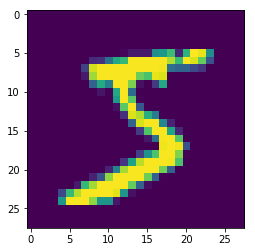

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

mnist = tf.keras.datasets.mnist
(training_images,training_labels),(test_images,test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

plt.imshow(training_images[0])

print(training_images.shape, training_labels.shape, test_images.shape, test_labels.shape)

class mycallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs = {}):
    if(logs.get('acc') > 0.99):
      print('accuracy reached beyond 99%')
      self.model.stop_training = True

callbacks = mycallbacks()

model3 = tf.keras.models.Sequential([keras.layers.Flatten(),
                                    keras.layers.Dense(units = 128, activation = tf.nn.relu),
                                    keras.layers.Dense(units = 10, activation = tf.nn.softmax)])

model3.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model3.fit(training_images,training_labels,epochs = 10, callbacks = [callbacks])

model3.evaluate(test_images, test_labels)

Week3: Convolutions, Summary, Visualize inner layers

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images,test_labels) = mnist.load_data()

training_images = training_images.reshape(60000,28,28,1)    #Conversion to single 4D tensor for conv to take input, flatten is also not used
test_images = test_images.reshape(10000,28,28,1)

print(training_images.shape, training_labels.shape, test_images.shape, test_labels.shape)

training_images = training_images/255.0
test_images = test_images/255.0

model3 = keras.models.Sequential()
model3.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), activation = 'relu', input_shape = (28,28,1)))
model3.add(keras.layers.MaxPooling2D(2,2))
model3.add(keras.layers.Conv2D(64,(3,3), activation = 'relu'))
model3.add(keras.layers.MaxPooling2D(2,2))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(128, activation = 'relu'))
model3.add(keras.layers.Dense(10, activation = 'softmax'))

model3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model3.summary()

model3.fit(training_images,training_labels, epochs = 5)

test_loss, test_acc = model3.evaluate(test_images,test_labels)
print(test_loss, test_acc)


FIRST_IMAGE = 2
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model3.layers]
activation_model = tf.keras.models.Model(inputs = model3.input ,outputs = layer_outputs)

plt.figure(5)
plt.imshow(test_images[FIRST_IMAGE].reshape(28,28))

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
  plt.figure(x)
  plt.imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  plt.grid(False)

(1, 5, 5, 64)

Week4: Image generator

In [0]:
#This need to learn on the PC, since the directory will be in the PC, this will not run on google colab

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model4 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1,activation = 'softmax')]) #1 neuron to define 2 outputs: Horse and Humans

model4.summary()

from tensorflow.keras.optimizers import RMSprop
model4.compile(optimizer = RMSprop(lr = 0.09), loss = 'binary_crossentropy', metrics = ['accuracy'])


from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory('C:/Users/Gaurav/Desktop/Data_Science/Tensor_Flow/horses_humans',
                                                   target_size = (300,300),
                                                   batch_size = 128,
                                                   class_mode = 'binary')

history = model4.fit_generator(train_generator,
                              steps_per_epoch = 8,
                              epochs = 15,
                              verbose = 1)


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 170528)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               87310848  
_________________________________________________________________
dense_23 (Dense)             (None, 1)               